In [13]:
import pytc
%matplotlib inline

# libraries for making pretty sliders
from IPython.html import widgets
from IPython.html.widgets import interactive
from IPython.display import display

class MainInterface:

    def __init__(self):
        """
        """

        self._models = {}

        self._populate_model_list()
        self._display_widgets()

    def _populate_model_list(self):
        """
        """

        for k in pytc.models.__dict__.keys():
            try:
                if pytc.models.__dict__[k].__bases__[0] == pytc.models.base.ITCModel:
                    self._models[k] = pytc.models.__dict__[k]
            except AttributeError:
                pass
  
        self._model_select_widget = widgets.DropdownWidget()
        self._model_select_widget.options = self._models
        self._model_select_interactive = widgets.interactive(self._select_model,
                                                             m=self._model_select_widget)

    def _display_widgets(self):
        """ 
        """ 

        display(self._model_select_widget)
    

    def _select_model(self,m):

        print(m.param_name)

M = MainInterface()



In [6]:
from IPython.html import widgets
from IPython.display import display

geo = {'USA':   ('CHI','NYC'),
       'Russia':('MOW','LED')}

def print_city(city):
    print(city)

def select_city(cities):
    cityW.options = cities


scW = widgets.DropdownWidget()
scW.options = geo

cityW = widgets.Select()
cityW.options = scW.value

i = widgets.interactive(select_city,cities=scW)
j = widgets.interactive(print_city,  city=cityW)


display(i)
display(j)

MOW


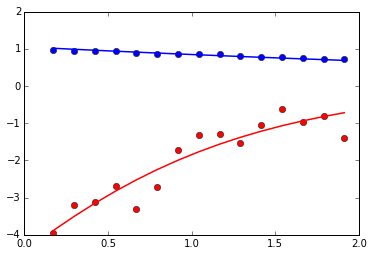

In [12]:
import pytc
%matplotlib inline

# libraries for making pretty sliders
from IPython.html import widgets
from IPython.html.widgets import interactive
from IPython.display import display


class Interface:
    
    def __init__(self,fitter):
        """
        """
        
        self._sliders = {}
        self._fitter = fitter
        self._build_interface()
        
    def _build_interface(self):
        """
        """
    
        for p in self._fitter.param_names:
            
            
            g = abs(self._fitter._param_guesses[p])
            
            if g == 0:
                g_min = -1
                g_max = 1
                g_step = 1/100
            else:
                g_min = -g
                g_max = g
                g_step = 2*abs(g)/100
            
            self._sliders[p] = widgets.FloatSlider(min=g_min,max=g_max,step=g_step,value=g)
            
        w = widgets.interactive(self._update,**self._sliders)
                        
        display(w)
        
        btn = widgets.Button(description="Show Fit")
        btn.on_click(self.get_param)
        display(btn)

    def _update(self,**kwargs):
        """
        """
   
        self._fitter.update_guesses(kwargs)
        self._fitter.fit()
        self._fitter.plot()
        
    def get_param(self):
        
        print(self._fitter.fit_param)
        
        
f = pytc.GlobalFit({"K":1e6,
                    "dH":-4000,
                    "fx_competent":1.0,
                    "dilution_heat":0.0,
                    "dilution_intercept":0.0})

e1 = pytc.ITCExperiment("test-data/blank.DH",pytc.models.Blank)
f.add_experiment(e1)

e2 = pytc.ITCExperiment("test-data/real-blank-match.DH",pytc.models.SingleSite)
f.add_experiment(e2)
another_wrapper = Interface(f)


{'dH3': 10346359041.150944, 'fx_competent': 0.6054672046885865, 'dH2': -683.14832846007039, 'dH1': 4140.7067074298438, 'beta1': 33494239.661605757, 'dilution_heat': -75218.642783816642, 'beta3': 10916966849.293322, 'beta2': 276351141815.1015}


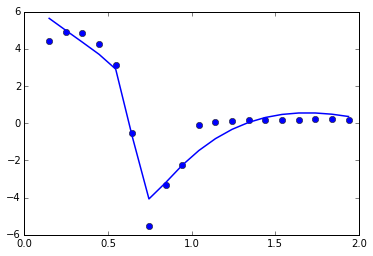

In [14]:

f = pytc.GlobalFit({"K":1e6,"beta1":1e6,"beta2":1e6,"beta3":1e6,
                    "dH":-4000,"dH1":-4000,"dH2":-4000,"dH3":1e6,
                    "fx_competent":1.0,
                    "dilution_heat":0.0,
                    "dilution_intercept":0.0})

e1 = pytc.ITCExperiment("test-data/wacky-double-1.DH",pytc.models.BindingPolynomial,num_sites=3)
f.add_experiment(e1)

#e2 = pytc.ITCExperiment("test-data/real-blank-match.DH",pytc.models.BindingPolynomial,num_sites=1) 
#f.add_experiment(e2)

#e3 = pytc.ITCExperiment("test-data/real-blank-match.DH",pytc.models.SingleSite)
#f.add_experiment(e3)


f.fit()
f.plot()
print(f.fit_param)

{'fx2': 1.6084570617361482, 'K': 28211.880712320366, 'dH': -5838.5694163412472, 'dil2': -5511.9332625484158}


/home/harmsm/Desktop/pytc/pytc/models/single_site.py:57: RuntimeWarning: invalid value encountered in sqrt
  ST = (b - np.sqrt((b)**2 - 4*S_conc_corr*self._T_conc))/2


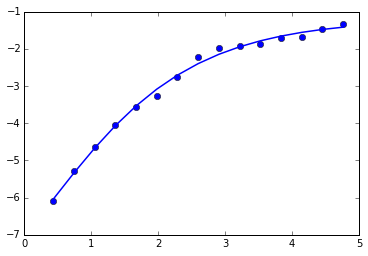

In [4]:

# Set up the global fit with parameter guesses
fitter = pytc.GlobalFit({"beta1":1e6,"dH1":-4000,"beta2":-10,"dH2":-2000,"fx_competent":1.0, "dilution_heat":0.0,
                         "K":1e6,"dH":-2000,"fx2":1.0,"dil2":0.0})

# Load in an experiment
#e1 = pytc.ITCExperiment("test-data/wacky-double-1.DH",pytc.models.BindingPolynomial,num_sites=1)#pytc.models.SingleSite) #pytc.models.BindingPolynomial,num_sites=1)

# Associate the global K1 parameter with the local KA parameter, etc.
#fitter.add_experiment(e1) #,dilution_heat=10000.0)

# Load in another experiment
e2 = pytc.ITCExperiment("test-data/hA5NCX1TESCaTCEP.DH",pytc.models.SingleSite)
fitter.add_experiment(e2,{"K":"K",
                          "dH":"dH",
                          "fx2":"fx_competent",
                          "dil2":"dilution_heat"})

# Do the global fit
fitter.fit()

# Plot the fit
fitter.plot()

# Print out the final fit parameters
print(fitter.fit_param)